### Problem statement

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetching the data from github and creating a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
# getting the shape of the dataframe
df.shape

(907, 27)

- we have 907 rows and 27 columns

#### Getting statistical information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- we have 12 object type variables and 15 float type data
- we can also see there are lot of null values present in the data

In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


- There is lot of difference in columns comaparingly in mean and std , 75% and max and we can assume there are lot of outliers in the data
- Higher std than mean in the features indicates the presence of skewness

### Visualizing the NULL values

<AxesSubplot:>

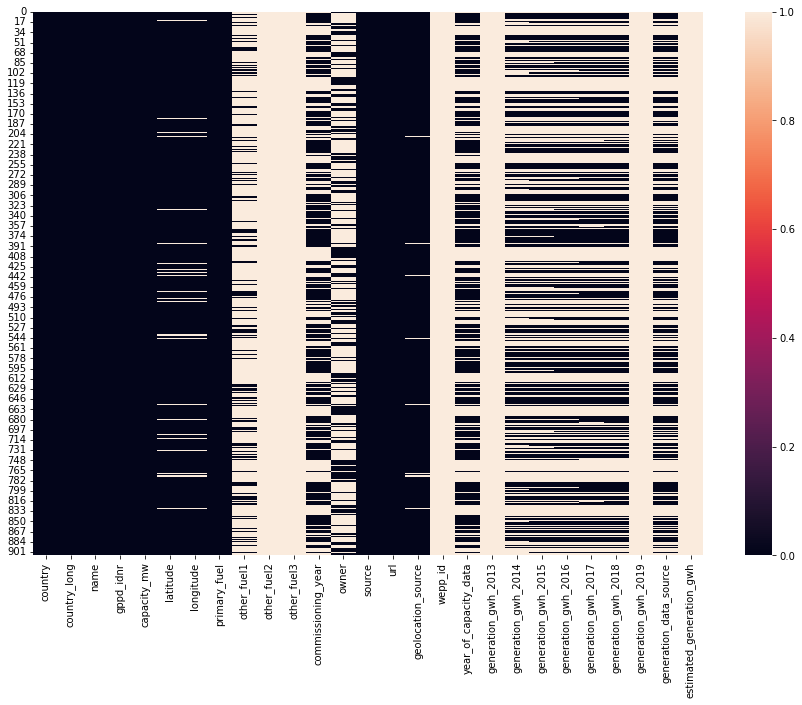

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

### Checking Categeorical variables

In [7]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [8]:
# Lets find the unique values which are present in categeorical columns
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

country
IND    907
Name: country, dtype: int64
--------------------------------------
country_long
India    907
Name: country_long, dtype: int64
--------------------------------------
name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
--------------------------------------
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
--------------------------------------
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_

### Finding count of unique and null values in DataFrame 

In [9]:
len(df['name'].unique())

907

In [10]:
len(df['gppd_idnr'].unique())

907

In [11]:
df['other_fuel1'].isna().value_counts()

True     709
False    198
Name: other_fuel1, dtype: int64

In [12]:
df['other_fuel2'].isna().value_counts()

True     906
False      1
Name: other_fuel2, dtype: int64

In [13]:
df['other_fuel3'].isna().value_counts()

True    907
Name: other_fuel3, dtype: int64

In [14]:
df['commissioning_year'].isna().value_counts()

False    527
True     380
Name: commissioning_year, dtype: int64

In [15]:
len(df['commissioning_year'].unique())

74

In [16]:
print(len(df['owner'].unique()))
df['owner'].isna().value_counts()

281


True     565
False    342
Name: owner, dtype: int64

In [17]:
print(len(df['source'].unique()))
df['source'].isna().value_counts()

191


False    907
Name: source, dtype: int64

In [18]:
print(len(df['url'].unique()))
df['url'].isna().value_counts()

304


False    907
Name: url, dtype: int64

In [19]:
print(len(df['geolocation_source'].unique()))
df['geolocation_source'].isna().value_counts()

4


False    888
True      19
Name: geolocation_source, dtype: int64

In [20]:
print(len(df['generation_data_source'].unique()))
df['generation_data_source'].isna().value_counts()

2


True     458
False    449
Name: generation_data_source, dtype: int64

In [21]:
print(len(df['estimated_generation_gwh'].unique()))
df['estimated_generation_gwh'].isna().value_counts()

1


True    907
Name: estimated_generation_gwh, dtype: int64

In [22]:
print(len(df['primary_fuel'].unique()))
df['primary_fuel'].isna().value_counts()

8


False    907
Name: primary_fuel, dtype: int64

#### Observations
- country and country_long has no other country data,but the data description was talking about all over world data,anyways we will be taking only one among them as they speaking about same thing
- name column has 907 power plant names each speaks about their individual plant,no duplicates or repeated powe plants
- Same with 'gppd_idnr' which talks aboud unique code for the power plant
- Primary_fuel has 8 different categeories but nuclear has the very less contrbution in the data
- other_fuel1 has 3 categeories with 709 null values
    * oil
    * Gas
    * cogeneration
- other_fuel2 has only 1 value and remaining 906 are null values
- other_fuel3 has all the null values in the dataframe
- commissioning_year has 74 unique values in dataframe and has 380 null values
- owner feature in dataframe has 281 unique names and 565 null values in it
- source feature has 191 unique values with null values present in it
- url has 304 unique values with no nulls
- geolocation_source has 4 unique values and 19 null values
- we have 2 unique values and 458 null values for generation_data_source feature


### Dropping Unwanted columns
##### Dropping columns
- country
- country_long
- url
- name
- gppd_idnr
- other_fuel1
- other_fuel2
- other_fuel3
- wepp_id
- generation_gwh_2013
- generation_gwh_2019
- estimated_generation_gwh
- owner

- Dropping country,country_long,name,gppd_idnr,has only one unique value
- urls are not much useful so dropping it
- other_fuel1,other_fuel2,other_fuel3 has null values more than actual values so proceeding with it would lead to less acciracy so dropping
- wepp_id,generation_gwh_2013,generation_gwh_2019 has all null values so dropping it
- Dropped Most of the columns which are having half of data as null values

In [23]:
df.drop(columns=['country','country_long','url','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','owner','generation_gwh_2017','generation_gwh_2014','generation_gwh_2015',
                 'generation_gwh_2016','generation_gwh_2018','generation_data_source'],inplace=True)

In [24]:
df.shape

(907, 8)

- After dropping we have 14 columns and 907 rows

In [25]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
# Lets find the unique values which are present in categeorical columns
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
--------------------------------------
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
-----------

### Visualizing the categeorical variables

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

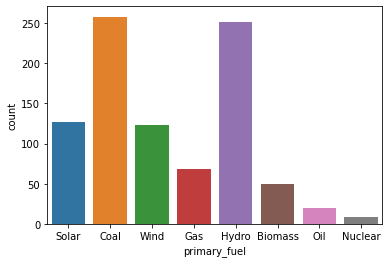

In [26]:
sns.countplot(df['primary_fuel'])

- Most of the primary fuel has coal in it followed by Hydro,Solar,Wind,Gas,Biomass,Oil,Nuclear 

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

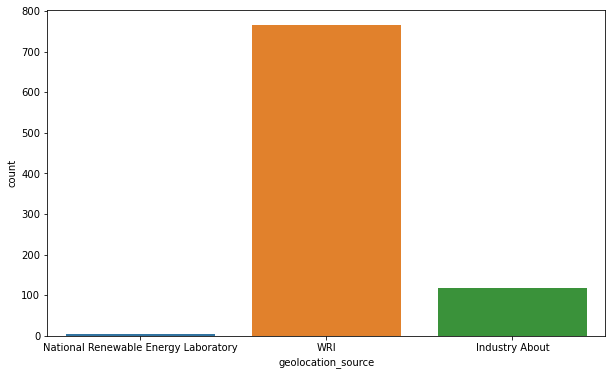

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df['geolocation_source'])

- WRI related data is more in dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   source                 907 non-null    object 
 6   geolocation_source     888 non-null    object 
 7   year_of_capacity_data  519 non-null    float64
dtypes: float64(5), object(3)
memory usage: 56.8+ KB


- After cleaning some of the unwanted data we have null values in
    * latitude
    * longitude
    * commissioning_year
    * geolocation_source
    * year_of_capacity_data
    * generation_gwh_2014
    * generation_gwh_2015
    * generation_gwh_2016
    * generation_gwh_2017
    * generation_gwh_2018
    * generation_data_source

In [29]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

In [30]:
df.shape

(907, 8)

In [31]:
print(len(df['commissioning_year'].unique()))

74


##### Filling the null values of categeorical variables with mode of the columns

In [32]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [33]:
df['latitude'].fillna(df['latitude'].median(),inplace=True)
df['longitude'].fillna(df['longitude'].median(),inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(),inplace=True)

- All the null values are taken out from the data set

#### Visualization

In [34]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI,2019.0
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI,2019.0
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0


In [35]:
# Changing the commissioning year, year_of_capacity_data to int type
df['commissioning_year'] = df['commissioning_year'].astype(int)
df['year_of_capacity_data'] = df['year_of_capacity_data'].astype(int)

Text(0, 0.5, 'Capacity')

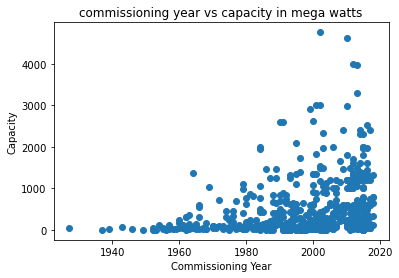

In [36]:
plt.scatter(df.commissioning_year,df.capacity_mw)
plt.title('commissioning year vs capacity in mega watts')
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity')

- As per the graph as as the commmisioning year is increasing capacity is also getting increased
- There is huge capacity in 2020

Text(0, 0.5, 'primary fuel')

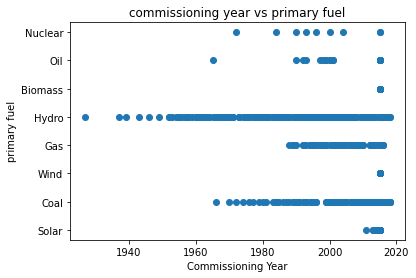

In [37]:
plt.scatter(df.commissioning_year,df.primary_fuel)
plt.title('commissioning year vs primary fuel')
plt.xlabel('Commissioning Year')
plt.ylabel('primary fuel')

Text(0, 0.5, 'Capacity(mw)')

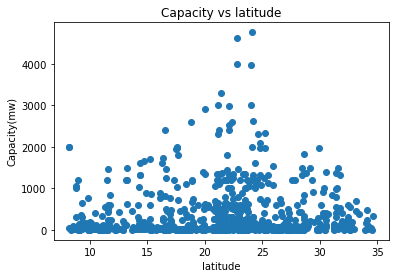

In [38]:
plt.scatter(df.latitude,df.capacity_mw)
plt.title('Capacity vs latitude')
plt.xlabel('latitude')
plt.ylabel('Capacity(mw)')

- As we can see in the latitude range 20-25 there is good power generation capacity

Text(0, 0.5, 'Capacity(mw)')

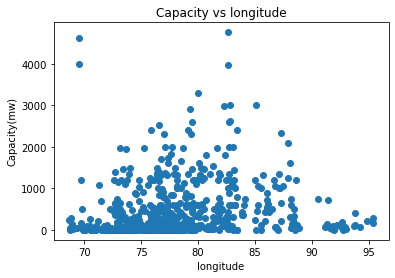

In [39]:
plt.scatter(df.longitude,df.capacity_mw)
plt.title('Capacity vs longitude')
plt.xlabel('longitude')
plt.ylabel('Capacity(mw)')

- As we can see in the logitude range 73-80 there is good power generation capacity

Text(0, 0.5, 'Capacity')

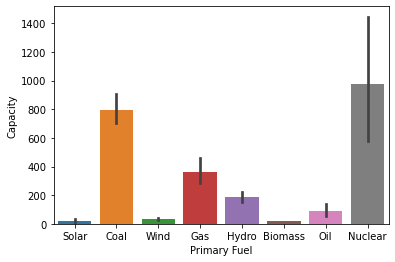

In [40]:
##### Comparing primary fuel and its capacity
sns.barplot(x=df.primary_fuel,y=df.capacity_mw)
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity')

- Nuclear has ranked top among all other fuels

Text(0, 0.5, 'Capacity')

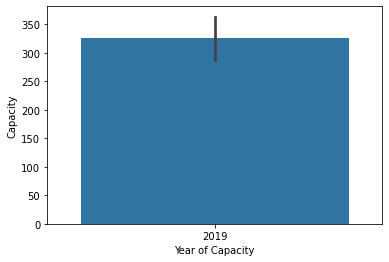

In [41]:
##### Comparing primary fuel and its capacity
sns.barplot(x=df.year_of_capacity_data,y=df.capacity_mw)
plt.xlabel('Year of Capacity')
plt.ylabel('Capacity')

In [42]:
df['year_of_capacity_data'].unique()

array([2019])

- As year of capacity has only one value dropping it

In [43]:
df.drop(columns='year_of_capacity_data',axis=1,inplace=True)

Text(0, 0.5, 'Latitude')

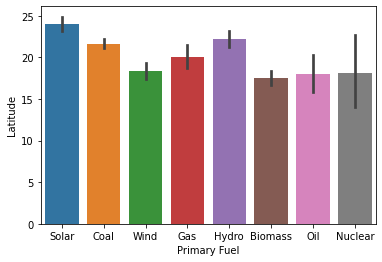

In [44]:
##### Comparing primary fuel and latitude
sns.barplot(x=df.primary_fuel,y=df.latitude)
plt.xlabel('Primary Fuel')
plt.ylabel('Latitude')

- Solar type is more in latitude feature

Text(0, 0.5, 'Longitude')

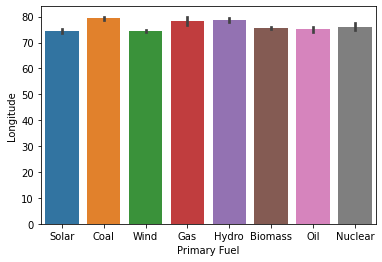

In [45]:
##### Comparing primary fuel and latitude
sns.barplot(x=df.primary_fuel,y=df.longitude)
plt.xlabel('Primary Fuel')
plt.ylabel('Longitude')

- Coal,Gas,Hydro has high value with respect to primary fuel
- Althogh all has same values with slight difference

#### Correlation

<AxesSubplot:>

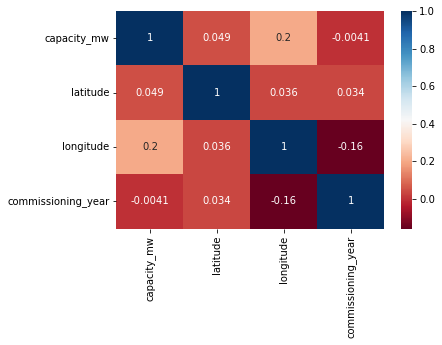

In [46]:
sns.heatmap(df.corr(),cmap='RdBu',annot=True)

#### Label Encoding

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  907 non-null    int64  
 5   source              907 non-null    object 
 6   geolocation_source  907 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 49.7+ KB


In [48]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['primary_fuel'] = lbe.fit_transform(df['primary_fuel'])
df['source'] = lbe.fit_transform(df['source'])
df['geolocation_source'] = lbe.fit_transform(df['geolocation_source'])

In [49]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011,109,1
1,98.0,24.7663,74.6090,1,2015,174,2
2,39.2,21.9038,69.3732,7,2015,21,2
3,135.0,23.8712,91.3602,2,2004,22,2
4,1800.0,21.9603,82.4091,1,2015,22,2


In [50]:
df1_x = df.drop(columns='primary_fuel').copy()
df1_y = df['primary_fuel'].copy()
x1_outlier = df1_x.copy()
x1_outlier

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011,109,1
1,98.0,24.7663,74.6090,2015,174,2
2,39.2,21.9038,69.3732,2015,21,2
3,135.0,23.8712,91.3602,2004,22,2
4,1800.0,21.9603,82.4091,2015,22,2
...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016,22,2
903,3.0,12.8932,78.1654,2015,77,0
904,25.5,15.2758,75.5811,2015,21,2
905,80.0,24.3500,73.7477,2015,59,2


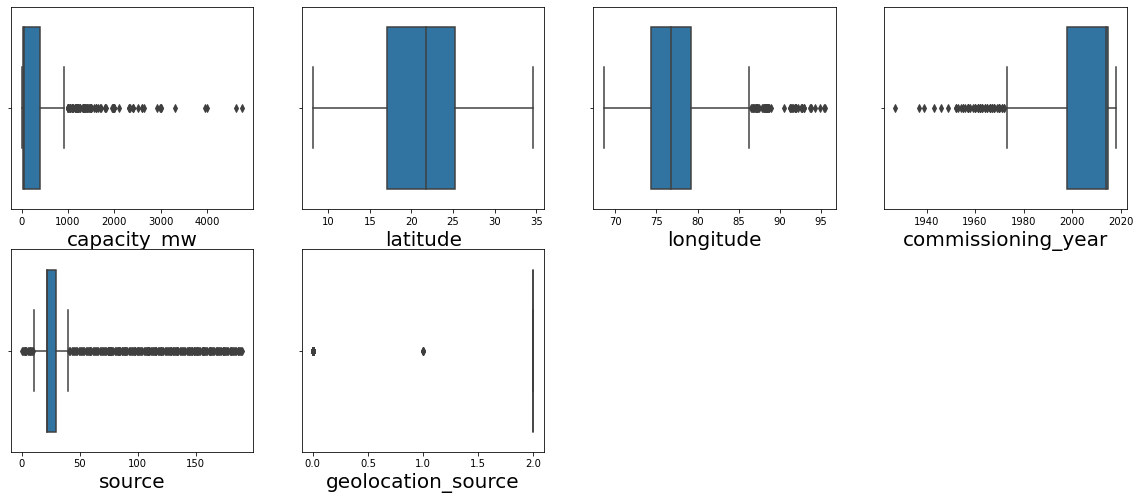

In [51]:
plt.figure(figsize=(20,35),facecolor='white')
plot_num = 1
for i in x1_outlier:
    if plot_num<=6:
        plt.subplot(8,4,plot_num)
        sns.boxplot(x1_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_num+=1
plt.show()

- For primary_fuel target variable, we can say that there are outliers in capacity_mw ,longitude, commisioning year,source and geolocation_cource features

In [52]:
df2_x = df.drop(columns='capacity_mw').copy()
df2_y = df['capacity_mw'].copy()
x2_outlier = df2_x.copy()
x2_outlier

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,73.2407,6,2011,109,1
1,24.7663,74.6090,1,2015,174,2
2,21.9038,69.3732,7,2015,21,2
3,23.8712,91.3602,2,2004,22,2
4,21.9603,82.4091,1,2015,22,2
...,...,...,...,...,...,...
902,16.2949,77.3568,1,2016,22,2
903,12.8932,78.1654,6,2015,77,0
904,15.2758,75.5811,7,2015,21,2
905,24.3500,73.7477,1,2015,59,2


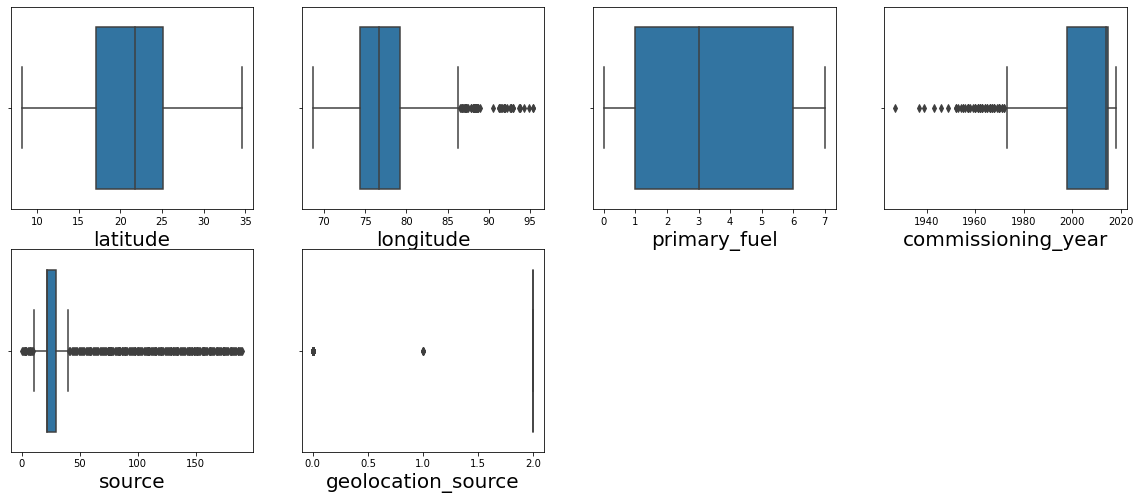

In [53]:
plt.figure(figsize=(20,35),facecolor='white')
plot_num = 1
for i in x2_outlier:
    if plot_num<=6:
        plt.subplot(8,4,plot_num)
        sns.boxplot(x2_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_num+=1
plt.show()

- For capacity_mw target variable, we can say that there are outliers in longitude,commissioning_year,source,geolocation source features

#### Outliers removal for classification problem
###### Z-score Method

In [54]:
# Applying z-score to remove outliers
from scipy.stats import zscore
z = np.abs(zscore(x1_outlier[['capacity_mw','latitude','longitude','commissioning_year']]))
x_score_cl = x1_outlier[(z<3).all(axis=1)]

In [55]:
x_score_cl.shape

(853, 6)

In [56]:
print('After removing outliers from data set we have loss of ',((907-853)/907)*100)

After removing outliers from data set we have loss of  5.953693495038589


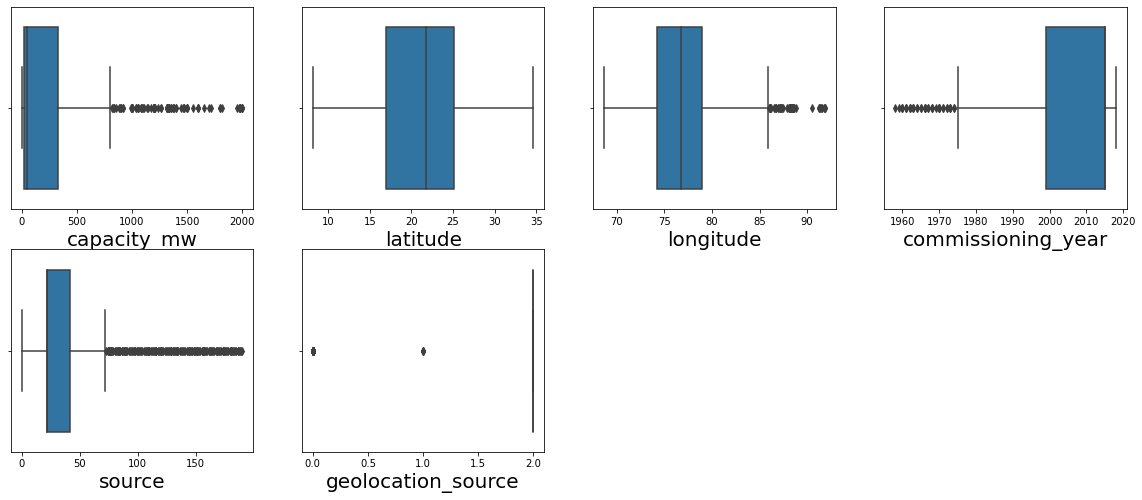

In [57]:
plt.figure(figsize=(20,35),facecolor='white')
plot_num = 1
for i in x_score_cl:
    if plot_num<=6:
        plt.subplot(8,4,plot_num)
        sns.boxplot(x_score_cl[i])
        plt.xlabel(i,fontsize=20)
    plot_num+=1
plt.show()

#### Outliers removal for regression problem
###### Z-score Method

In [58]:
# Applying z-score to remove outliers
from scipy.stats import zscore
z = np.abs(zscore(x2_outlier[['latitude','longitude','commissioning_year']]))
x_score_rg = x2_outlier[(z<3).all(axis=1)]

In [59]:
x_score_rg.shape

(873, 6)

In [60]:
print('After removing outliers from data set we have loss of ',((907-873)/907)*100)

After removing outliers from data set we have loss of  3.7486218302094816


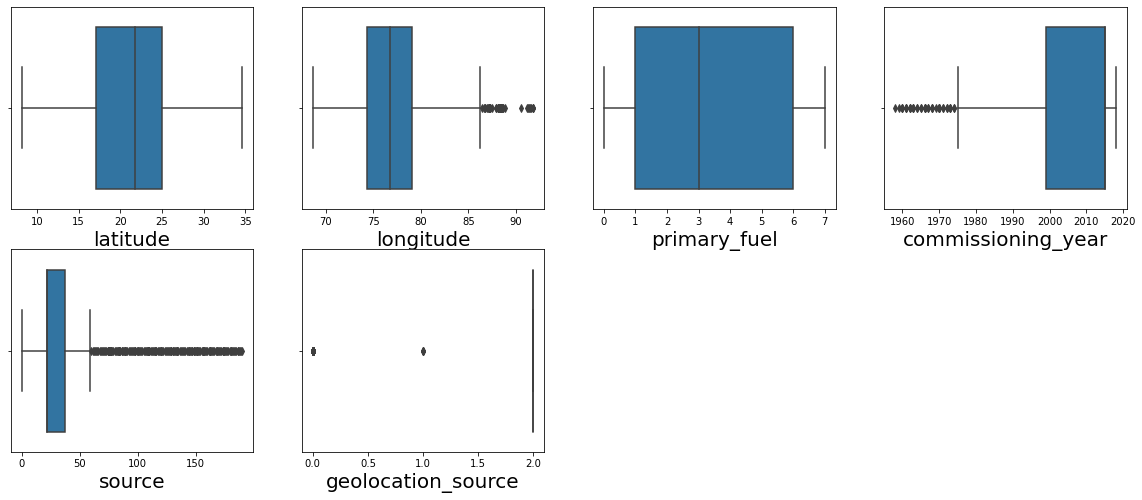

In [61]:
plt.figure(figsize=(20,35),facecolor='white')
plot_num = 1
for i in x_score_rg:
    if plot_num<=6:
        plt.subplot(8,4,plot_num)
        sns.boxplot(x_score_rg[i])
        plt.xlabel(i,fontsize=20)
    plot_num+=1
plt.show()

In [62]:
classification_df = df.copy()
regression_df = df.copy()

##### Classification Model

In [63]:
drop_index = classification_df.index.difference(x_score_cl.index)
classification_df.drop(drop_index,inplace=True)
classification_df.reset_index(drop=True,inplace=True)
classification_df.shape

(853, 7)

##### Regression Model

In [64]:
drop_index = regression_df.index.difference(x_score_rg.index)
regression_df.drop(drop_index,inplace=True)
regression_df.reset_index(drop=True,inplace=True)
regression_df.shape

(873, 7)

#### Finding skewness for both classification and regression models

##### Checking skewness for classification problem

In [65]:
df_powertransform_cl = classification_df.copy()
df_powertransform_rg = regression_df.copy()

In [66]:
x1_cl = df_powertransform_cl.drop(columns=['primary_fuel'])
y1_cl = df_powertransform_cl['primary_fuel']
y1_cl.value_counts()

1    238
3    222
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [67]:
x1_rg = df_powertransform_rg.drop(columns=['capacity_mw'])
y1_rg = df_powertransform_rg['capacity_mw']
y1_rg.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
32.50       1
119.80      1
21.84       1
195.00      1
106.60      1
Name: capacity_mw, Length: 347, dtype: int64

In [68]:
x1_cl.skew()

capacity_mw           1.994210
latitude             -0.125853
longitude             0.941427
commissioning_year   -1.526273
source                1.737981
geolocation_source   -2.070461
dtype: float64

In [69]:
from sklearn.preprocessing import power_transform
x2_cl = x1_cl[['capacity_mw','latitude','longitude','commissioning_year']]
x2_cl_skew = power_transform(x2_cl)
x2_cl_skew = pd.DataFrame(x2_cl_skew,columns=x2_cl.columns)
x2_cl_skew.skew()

capacity_mw           0.015969
latitude             -0.072744
longitude             0.000143
commissioning_year   -1.089844
dtype: float64

- All teh columns are within allowablw skewness level -0.50 to +0.50

In [70]:
x1_rg.skew()

latitude             -0.138796
longitude             0.892834
primary_fuel          0.452333
commissioning_year   -1.529156
source                1.774890
geolocation_source   -2.109344
dtype: float64

In [71]:
x2_rg = x1_rg[['latitude','longitude','commissioning_year']]
x2_rg_skew = power_transform(x2_rg)
x2_rg_skew = pd.DataFrame(x2_rg_skew,columns=x2_rg.columns)
x2_rg_skew.skew()

latitude             -0.069854
longitude             0.003061
commissioning_year   -1.084131
dtype: float64

- All teh columns are within allowablw skewness level -0.50 to +0.50

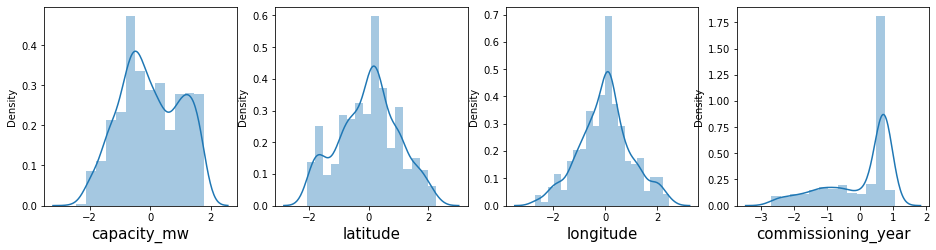

In [72]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x2_cl_skew:
    if plotnum<=30:
        plt.subplot(7,5,plotnum)
        sns.distplot(x2_cl_skew[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

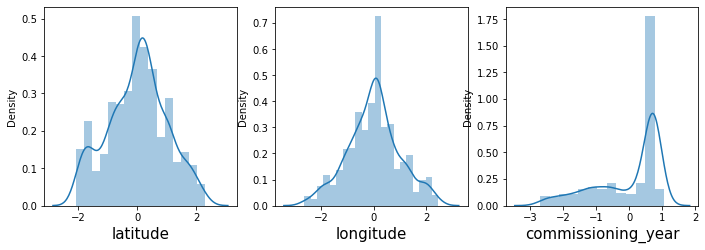

In [73]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x2_rg_skew:
    if plotnum<=30:
        plt.subplot(7,5,plotnum)
        sns.distplot(x2_rg_skew[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

#### Merging the skewness removed with dataset

In [74]:
drop_index = classification_df.index.difference(x2_cl_skew.index)
classification_df.drop(drop_index,inplace=True)
classification_df.reset_index(drop=True,inplace=True)
classification_df.shape

(853, 7)

In [75]:
drop_index = regression_df.index.difference(x2_rg_skew.index)
regression_df.drop(drop_index,inplace=True)
regression_df.reset_index(drop=True,inplace=True)
regression_df.shape

(873, 7)

#### Feature and Target Selection

In [76]:
x_cl = classification_df.drop(columns=['primary_fuel'])
y_cl = classification_df['primary_fuel']

In [77]:
x_rg = regression_df.drop(columns=['capacity_mw'])
y_rg = regression_df['capacity_mw']

#### Checking multicollinearity using standarad scalar

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled_cl = sc.fit_transform(x_cl)

In [79]:
x_scaled_rg = sc.fit_transform(x_rg)

#### Obtaining multicollinearity using VIF

In [80]:
vif_cl = pd.DataFrame().copy()
vif_rg = pd.DataFrame().copy()

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_cl['columns'] = x_cl.columns
vif_cl['vif_cl'] = [variance_inflation_factor(x_scaled_cl,i)for i in range(x_scaled_cl.shape[1])]
vif_cl

,columns,vif_cl
0,capacity_mw,1.160571
1,latitude,1.052481
2,longitude,1.144716
3,commissioning_year,1.149435
4,source,1.473955
5,geolocation_source,1.460016


In [82]:
vif_rg['columns'] = x_rg.columns
vif_rg['vif_rg'] = [variance_inflation_factor(x_scaled_rg,i)for i in range(x_scaled_rg.shape[1])]
vif_rg

,columns,vif_rg
0,latitude,1.059938
1,longitude,1.252386
2,primary_fuel,1.640012
3,commissioning_year,1.160633
4,source,1.611531
5,geolocation_source,1.958523


- From the above data sets we can see we have same multicollinearity among all the features , so going ahead with PCA

#### Princple Component Analaysis

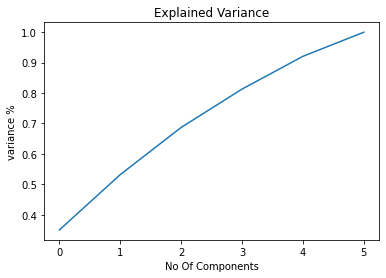

In [83]:
from sklearn.decomposition import PCA
pca_cl = PCA()
principle_component_cl = pca_cl.fit_transform(x_scaled_cl)
plt.figure()
plt.plot(np.cumsum(pca_cl.explained_variance_ratio_))
plt.xlabel('No Of Components')
plt.ylabel('variance %')
plt.title('Explained Variance')
plt.show()

In [84]:
pca_new_cl = PCA(n_components=6)
new_components_cl = pca_new_cl.fit_transform(x_scaled_cl)
x_principle_cl = pd.DataFrame(new_components_cl,columns=np.arange(6))
x_principle_cl

,0,1,2,3,4,5
0,2.155763,0.626800,0.651709,0.007428,0.069729,-0.456847
1,1.985250,0.224324,-0.376135,0.293970,-0.016845,-2.280921
2,0.644975,-0.728542,0.436269,-1.631588,-0.749528,0.035195
3,-1.634844,1.116778,-0.545537,2.509174,-1.107888,0.349305
4,-1.983781,2.263326,-1.939557,-0.844607,1.128773,-0.038939
...,...,...,...,...,...,...
848,-1.462214,0.971517,-1.942347,-1.535477,1.308202,0.047142
849,1.877183,-0.566040,-0.987953,1.083076,0.966450,1.563565
850,-0.041512,-1.100433,-0.574274,-0.400802,-0.641174,0.358574
851,0.719662,-0.018396,0.136935,-0.637046,-0.735797,-0.521391


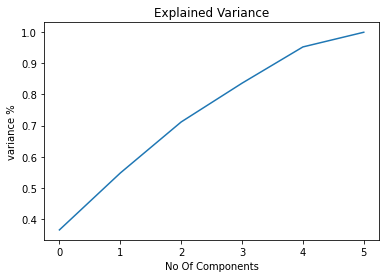

In [85]:
pca_rg = PCA()
principle_component_rg = pca_rg.fit_transform(x_scaled_rg)
plt.figure()
plt.plot(np.cumsum(pca_rg.explained_variance_ratio_))
plt.xlabel('No Of Components')
plt.ylabel('variance %')
plt.title('Explained Variance')
plt.show()

In [86]:
pca_new_rg = PCA(n_components=6)
new_components_rg = pca_new_rg.fit_transform(x_scaled_rg)
x_principle_rg = pd.DataFrame(new_components_rg,columns=np.arange(6))
x_principle_rg

,0,1,2,3,4,5
0,2.378864,0.399787,0.733764,0.340560,-0.079774,-0.624917
1,1.184343,1.894520,-1.157542,1.373715,-0.981056,-1.100469
2,1.224356,-1.646226,0.483683,-0.639360,-1.297218,-0.440549
3,-1.975532,1.630721,0.167434,-1.294898,1.798368,-0.463569
4,-1.081799,1.017020,-0.406572,-0.904242,0.082867,0.299032
...,...,...,...,...,...,...
868,-0.711050,0.034481,-1.073630,-0.420610,-0.481548,0.670415
869,2.194900,-0.572969,-0.914222,-0.253701,1.990859,0.805804
870,0.507005,-1.640802,-0.439842,-1.063217,-0.000339,-0.576841
871,0.131767,0.728189,-0.274631,0.206483,-1.332127,0.233195


#### Selecting K-best features

In [87]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features_cl =SelectKBest(score_func=f_classif,k=6)
best_fit_cl = best_features_cl.fit(x_cl,y_cl)
scores_cl = pd.DataFrame(best_fit_cl.scores_)
columns_cl = pd.DataFrame(x_cl.columns)
featuresScores_cl = pd.concat([columns_cl,scores_cl],axis=1)
featuresScores_cl.columns = ['features','scores']
print(featuresScores_cl.nlargest(6,'scores'))

             features       scores
5  geolocation_source  2494.135798
4              source   100.980550
3  commissioning_year   100.037535
0         capacity_mw    59.862187
2           longitude    32.500425
1            latitude    14.678357


In [88]:
best_features_rg =SelectKBest(score_func=f_classif,k=6)
best_fit_rg = best_features_rg.fit(x_rg,y_rg)
scores_rg = pd.DataFrame(best_fit_rg.scores_)
columns_rg = pd.DataFrame(x_rg.columns)
featuresScores_rg = pd.concat([columns_rg,scores_rg],axis=1)
featuresScores_rg.columns = ['features','scores']
print(featuresScores_rg.nlargest(6,'scores'))

             features    scores
5  geolocation_source  3.282823
2        primary_fuel  3.163188
3  commissioning_year  1.906245
1           longitude  1.772888
4              source  1.684017
0            latitude  1.348412


- Best featured columns for classification and regression has reasonable scores so need of dropping any column

In [89]:
x_best_cl = x_cl.copy()
x_best_rg = x_rg.copy()

#### Handling class imbalance

In [90]:
import imblearn
from imblearn.over_sampling import SMOTE

In [91]:
sm = SMOTE()
x_over_cl, y_over_cl = sm.fit_resample(x_best_cl,y_cl)

In [92]:
x_cl = sc.fit_transform(x_over_cl)
y_cl = y_over_cl.copy()
x_rg = sc.fit_transform(x_rg)
y_rg = y_rg.copy()

### Finding Best Random state
#### Classification problem

In [93]:
x = x_cl.copy()
y = y_cl.copy()

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7123519458544839 on random_state: 65


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = 65)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from xgboost import XGBClassifier


In [100]:
from sklearn.metrics import classification_report
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        accurcy = classification_report(y_test,model_predict)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print('Accuracy : ',accurcy)
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

Accuracy :                precision    recall  f1-score   support

           0       0.66      0.93      0.77        74
           1       0.61      0.49      0.54        76
           2       0.65      0.34      0.44        71
           3       0.51      0.44      0.47        71
           4       0.68      0.82      0.74        79
           5       0.54      0.51      0.52        72
           6       1.00      0.96      0.98        81
           7       0.80      1.00      0.89        67

    accuracy                           0.69       591
   macro avg       0.68      0.69      0.67       591
weighted avg       0.68      0.69      0.67       591

R2 score of the model :  LogisticRegression() = 45.9 %
mean squared error for model :  LogisticRegression() = 2.8071065989847717
cross val score for model :  LogisticRegression() = 0.678046218487395
_______________________________________________
Accuracy :                precision    recall  f1-score   support

           0       0.86

- Random forest classifier has highest accuracy,lets go with hyper tuning and pick best outcome

#### Hyper Parameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
random_forest_params = {'ccp_alpha':np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001]),
                   'max_depth':[150,200,250,300],
                   'bootstrap':[True,False],
                   'criterion':['gini','entropy'],
                    'max_features':['auto','sqrt','log2']
    }
grid_classifier = GridSearchCV(RandomForestClassifier(),random_forest_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

The best parameters are {'bootstrap': False, 'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 250, 'max_features': 'sqrt'}
The best Score is 0.9047804255072128


### Traning the model with best parameters

In [104]:
best_model = RandomForestClassifier(ccp_alpha=0.0001,bootstrap=False,criterion='gini',max_depth=250,max_features='sqrt')
best_model.fit(x_train,y_train)
random_forest_pred_best = best_model.predict(x_test)
random_forest_acc = accuracy_score(y_test,random_forest_pred_best)
print(random_forest_acc*100)

90.18612521150592


##### Confusion matrix

In [105]:
confusion_matrix = confusion_matrix(y_test,random_forest_pred_best)
confusion_matrix

array([[70,  3,  0,  0,  0,  0,  0,  1],
       [ 2, 59,  3,  5,  5,  1,  0,  1],
       [ 0,  5, 60,  1,  2,  3,  0,  0],
       [ 0,  4,  2, 58,  2,  5,  0,  0],
       [ 0,  1,  1,  0, 77,  0,  0,  0],
       [ 0,  4,  3,  2,  1, 62,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 67]])

### Saving classification model

In [106]:
import joblib
joblib.dump(best_model,"Global_powerplant_classif.pkl")

['Global_powerplant_classif.pkl']

### Loading classification model

In [107]:
mod = joblib.load("Global_powerplant_classif.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,5,5
1,6,6
2,4,4
3,1,1
4,6,6
...,...,...
586,4,2
587,6,6
588,7,7
589,1,1


- Based on above graph we can say most of the results are correctly predicted

#### Finding best random state for regression problem

In [115]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [112]:
x = x_rg.copy()
y = y_rg.copy()
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23, random_state = i)
    modRF =  Lasso()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.3243539575113107 on random_state: 92


In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23, random_state = maxRS)

In [117]:
models = [Lasso(),SVR(),AdaBoostRegressor(),Ridge(),RandomForestRegressor()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        square_root_mse = np.sqrt(mean_error)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('square root of mean squared error',square_root_mse)
        print('_______________________________________________')
compare_models()

R2 score of the model :  Lasso() = 32.4 %
mean squared error for model :  Lasso() = 153721.0959789282
cross val score for model :  Lasso() = 0.19541645330957713
square root of mean squared error 392.07281974006844
_______________________________________________
R2 score of the model :  SVR() = -22.0 %
mean squared error for model :  SVR() = 277678.36878298194
cross val score for model :  SVR() = -0.15135292296592873
square root of mean squared error 526.9519606026548
_______________________________________________
R2 score of the model :  AdaBoostRegressor() = 39.0 %
mean squared error for model :  AdaBoostRegressor() = 138836.54857740388
cross val score for model :  AdaBoostRegressor() = -0.10778239480310653
square root of mean squared error 372.60776773626696
_______________________________________________
R2 score of the model :  Ridge() = 32.4 %
mean squared error for model :  Ridge() = 153696.7483049786
cross val score for model :  Ridge() = 0.19505575936615144
square root of mean

- There is no difference b/w Lasso and Ridge also with mean squared and root mean squared erro values.
- SVR and adaboost is also having less difference ,but cross validation score is negative
- choosing random forest regressor as it has good r2score,mean squared error and root mean sqaured error comparing
with other models


##### Hyper Parameter Tuning

In [119]:
random_forest_params = {'n_jobs':[100,150,200,250,500],
                   'max_depth':[150,200,250,300],
                   'n_estimators':[100,150,200,250,500,1000],
                    'max_features':['auto','sqrt','log2']
    }
grid_classifier = GridSearchCV(RandomForestRegressor(),random_forest_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

The best parameters are {'max_depth': 250, 'max_features': 'log2', 'n_estimators': 200, 'n_jobs': 250}
The best Score is 0.5067639988329764


In [120]:
#### Training the model with best parameters
best_model_2 = RandomForestRegressor(max_depth=250,max_features='log2',n_estimators=200,n_jobs=250)
best_model_2.fit(x_train,y_train)
random_forest_reg_pred_best = best_model_2.predict(x_test)
r2_score_bm = r2_score(y_test,random_forest_reg_pred_best)
print('r2 Score of the best model is ', r2_score_bm)

r2 Score of the best model is  0.5476901557886171


#### Saving the model

In [121]:
joblib.dump(best_model,"Global_powerplant_regre.pkl")

['Global_powerplant_regre.pkl']

#### Loading the model

In [122]:
mod = joblib.load("Global_powerplant_regre.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,50.00,6
1,4.25,1
2,125.00,6
3,60.00,4
4,30.50,6
...,...,...
196,2.10,6
197,829.78,4
198,50.00,1
199,100.00,4


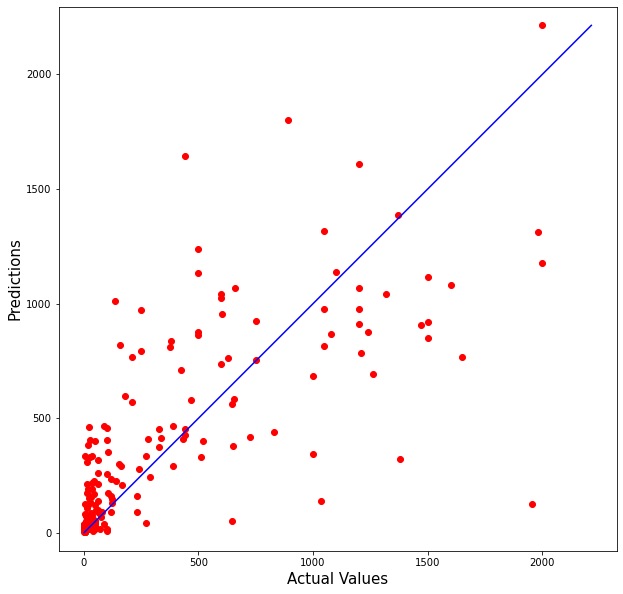

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, random_forest_reg_pred_best, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(random_forest_reg_pred_best), max(y_test))
p2 = min(min(random_forest_reg_pred_best), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

- 56.33 % values are equivalent to actual values